In [1]:
import uproot3 as uproot
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_HepMC='D:\\ARPE\\Reco\\Tracksummary\\Tel_x\\HepMC\\DP_m0.7586\\'
file_name=path_HepMC+'tracksummary_fitter_Precision.root'

In [16]:
path_vertex='D:\\ARPE\\Reco\\Tracksummary\\Tel_x\\Vertexing\\'
filename=path_vertex+'tracksummary_fitter_vert.root'

In [3]:
file = uproot.open(file_name)
tree = file["tracksummary"] 

#creating 2D array [[a,b],[c,d], ...] for all the branches from the root file, the array [a,b] represent the pair of decayed particle 
nMeasurements = tree.array("nMeasurements")
nOutliers = tree.array("nOutliers")
nHoles = tree.array("nHoles")
chi2Sum = tree.array("chi2Sum")
NDF = tree.array("NDF")
measurementChi2 = tree.array("measurementChi2")
outlierChi2 = tree.array("outlierChi2")
measurementVolume = tree.array("measurementVolume")
measurementLayer = tree.array("measurementLayer")
outlierVolume = tree.array("outlierVolume")
outlierLayer = tree.array("outlierLayer")
majorityParticleId = tree.array("majorityParticleId")
nMajorityHits = tree.array("nMajorityHits")
t_charge = tree.array("t_charge")
t_time = tree.array("t_time")

t_vx = tree.array("t_vx")
t_vy = tree.array("t_vy")
t_vz = tree.array("t_vz")
t_px = tree.array("t_px")
t_py = tree.array("t_py")
t_pz = tree.array("t_pz")
t_p = tree.array("t_p")
t_d0 = tree.array("t_d0")
t_z0 = tree.array("t_z0")

t_theta = tree.array("t_theta")
t_phi = tree.array("t_phi")
t_eta = tree.array("t_eta")
t_pT = tree.array("t_pT")
hasFittedParams = tree.array("hasFittedParams")
eLOC0_fit = tree.array("eLOC0_fit")
eLOC1_fit = tree.array("eLOC1_fit")
ePHI_fit = tree.array("ePHI_fit")
eTHETA_fit = tree.array("eTHETA_fit")
eQOP_fit = tree.array("eQOP_fit")
eT_fit = tree.array("eT_fit")


res_eLOC0_fit = tree.array("res_eLOC0_fit")
res_eLOC1_fit = tree.array("res_eLOC1_fit")
res_ePHI_fit = tree.array("res_ePHI_fit")
res_eTHETA_fit = tree.array("res_eTHETA_fit")
res_eQOP_fit = tree.array("res_eQOP_fit")
res_eT_fit = tree.array("res_eT_fit")
res_eQOP_fit_1d = res_eQOP_fit.flatten()

#Calcul of new variable

resid_phi=np.minimum(abs(abs(ePHI_fit)-abs(t_phi)),abs(abs(abs(ePHI_fit)-abs(t_phi))-np.pi)) #better variable for phi residual

resi_QOP=eQOP_fit+1/t_p

#Calcul of pz,px,py with fitted angle and truth angle (tTheta or tPhi) and residual of those value 
p_fit=(1.0 / abs(eQOP_fit))

pz_fit_tTheta = (1.0 / abs(eQOP_fit)) * np.cos(t_theta)
pz_fit = (1.0 / abs(eQOP_fit)) * np.cos(eTHETA_fit)

res_pz_fit=pz_fit-t_pz
res_pz_fit_rel=(pz_fit-t_pz)/t_pz
res_pz_fit_tTheta=pz_fit_tTheta-t_pz

res_res_pz=res_pz_fit-res_pz_fit_tTheta  #Difference between the momentum calculated with fitted angle and truth angle


px_fit_tPhi = (1.0 / abs(eQOP_fit)) * np.sin(t_theta)*np.cos(t_phi)
px_fit = (1.0 / abs(eQOP_fit)) * np.sin(eTHETA_fit)*np.cos(ePHI_fit)
res_px_fit=px_fit-t_px
res_px_fit_rel=(px_fit-t_px)/t_px
res_px_fit_tPhi=px_fit_tPhi-t_px
res_res_px=res_px_fit-res_px_fit_tPhi

py_fit_tPhi = (1.0 / abs(eQOP_fit)) * np.sin(t_theta)*np.sin(t_phi)
py_fit = (1.0 / abs(eQOP_fit)) * np.sin(eTHETA_fit)*np.sin(ePHI_fit)
res_py_fit=py_fit-t_py
res_py_fit_rel=(py_fit-t_py)/t_py
res_py_fit_tPhi=py_fit_tPhi-t_py

#MASS RESOLUTION
#Let's assume the decayed particles are Muons



#Only take element of the list truth and fitted that have the two tracks 
t_px_2D=t_px[[x.shape[0] >= 2 for x in t_px]]
t_py_2D=t_py[[x.shape[0] >= 2 for x in t_py]]
t_pz_2D=t_pz[[x.shape[0] >= 2 for x in t_pz]]
t_p_2D=t_p[[x.shape[0] >= 2 for x in t_p]]

px_fit_2D=px_fit[[x.shape[0] >= 2 for x in px_fit]]
py_fit_2D=py_fit[[x.shape[0] >= 2 for x in py_fit]]
pz_fit_2D=pz_fit[[x.shape[0] >= 2 for x in pz_fit]]
p_fit_2D=p_fit[[x.shape[0] >= 2 for x in p_fit]]


#Those are 2D array for each particle of the decay, I will take the momentum for each particle
t_px_1=t_px_2D[:, 0]
t_py_1=t_py_2D[:, 0]
t_pz_1=t_pz_2D[:, 0]
t_p_1=t_p_2D[:,0]

px_fit_1=px_fit_2D[:, 0]
py_fit_1=py_fit_2D[:, 0]
pz_fit_1=pz_fit_2D[:, 0]
p_fit_1=p_fit_2D[:, 0]


t_px_2=t_px_2D[:, 1]
t_py_2=t_py_2D[:, 1]
t_pz_2=t_pz_2D[:, 1]
t_p_2=t_p_2D[:, 1]

px_fit_2=px_fit_2D[:, 1]
py_fit_2=py_fit_2D[:, 1]
pz_fit_2=pz_fit_2D[:, 1]
p_fit_2=p_fit_2D[:, 1]


#Let's assume particles are muons 
mu=0.10565837
# t_E1=np.sqrt(mu**2+np.sqrt(t_px_1**2+t_py_1**2+t_pz_1**2)**2)
# t_E2=np.sqrt(mu**2+np.sqrt(t_px_2**2+t_py_2**2+t_pz_2**2)**2)
t_E1=np.sqrt(mu**2+t_p_1**2)
t_E2=np.sqrt(mu**2+t_p_2**2)


E1_fit=np.sqrt(mu**2+p_fit_1**2)
E2_fit=np.sqrt(mu**2+p_fit_2**2)

t_m2=(t_E1+t_E2)**2-(t_px_1+t_px_2)**2-(t_py_1+t_py_2)**2-(t_pz_1+t_pz_2)**2
t_m=np.sqrt(np.abs(t_m2))
m2_fit=(E1_fit+E2_fit)**2-(px_fit_1+px_fit_2)**2-(py_fit_1+py_fit_2)**2-(pz_fit_1+pz_fit_2)**2
m_fit=np.sqrt(np.abs(m2_fit))
# px_fit_1=px_fit[:,0]
# py_fit_1=px_fit[:,0]

C:\Users\salin\anaconda\lib\site-packages\awkward0\array\base.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


In [5]:
print("t_p  : {}".format(t_p))
print("")
print("t_px  : {}".format(t_px))
print("")
print("t_py  : {}".format(t_py))
print("")
print("t_pz  : {}".format(t_pz))

print("")
print("t_phi  : {}".format(t_phi))

t_p  : [[1393.9315199192959 5678.042723572672] [1971.5738322097418 5101.98695234027] [3204.4201952988547 3753.1893630921236] ... [284.255153007548 60.12391323596344] [953.6275016165138 201.70472692361204] [4986.978483021474 1414.3538044273046]]

t_px  : [[1393.9314628221 5678.0426831673] [1971.5737942917 5101.9869471959] [3204.4201627834 3753.1893294873] ... [284.2550291555 60.1232653739] [953.627161019 201.7045729881] [4986.978417955 1414.3537960832]]

t_py  : [[0.3302877415 0.6003276246] [0.3586599133 -0.0691764741] [0.3710802408 -0.3522808104] ... [-0.1488095914 0.2673489309] [-0.7229395054 0.1459131146] [0.6571771867 -0.10693094200000001]]

t_pz  : [[-0.22380609069999996 0.3137731584] [0.1444974125 -0.21842076480000003] [-0.2658680382 -0.3579787186] ... [-0.2196971914 0.0801756472] [0.3563210177 0.2020108416] [0.4659274114 -0.11031231060000002]]

t_phi  : [[0.00023694689741065577 0.00010572791644254225] [0.00018191553893748204 -1.3558732080602622e-05] [0.00011580261647677185 -9.386

In [6]:
print(t_E2)
print(t_px)

print(t_m)
print(m_fit)

[5678.04272456 5101.98695343 3753.18936458 ...   60.12400607  201.7047546
 1414.35380837]
[[1393.9314628221 5678.0426831673] [1971.5737942917 5101.9869471959] [3204.4201627834 3753.1893294873] ... [284.2550291555 60.1232653739] [953.627161019 201.7045729881] [4986.978417955 1414.3537960832]]
[0.75860033 0.75860026 0.75860019 ... 0.75860036 0.75860036 0.75860029]
[0.73701674 0.70265746 0.88424056 ... 0.76149123 0.75228963 0.75448654]


In [13]:
print("p_fit  : {}".format(p_fit))
print("")
print("px_fit  : {}".format(px_fit))
print("")
print("py_fit  : {}".format(py_fit))
print("")
print("pz_fit  : {}".format(pz_fit))

print("")
print("PHI_fit  : {}".format(ePHI_fit))

p_fit  : [[1373.2174 5579.9707] [2039.8333 5256.8457] [3364.2488 3231.111] ... [744.6586 5793.72] [] [268.25452 1894.075]]

px_fit  : [[1373.2174 5579.9707] [2039.8333 5256.8457] [3364.2488 3231.111] ... [744.65857 5793.72] [] [268.25427 1894.0748]]

py_fit  : [[0.32788074 0.5775308] [0.3405889 -0.015174658] [0.37309763 -0.47927517] ... [0.27970275 0.15574053] [] [0.35784116 0.70298386]]

pz_fit  : [[-0.20959638 0.31039718] [0.1567536 -0.17256261] [-0.28649655 -0.35527578] ... [0.012572821 0.41690856] [] [-0.050857432 -0.05585325]]

PHI_fit  : [[0.00023876826 0.000103500686] [0.000166969 -2.886647e-06] [0.00011090073 -0.00014833138] ... [0.00037561203 2.688092e-05] [] [0.0013339617 0.0003711489]]


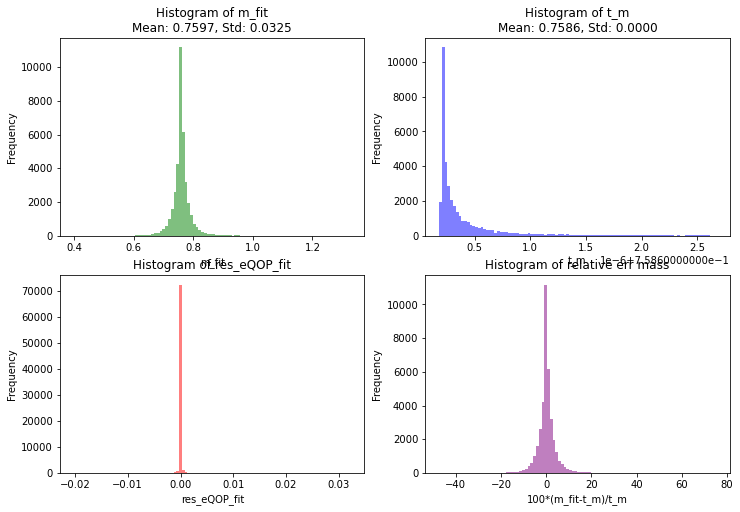

In [8]:
m_fit_t_m_ratio = 100 * (m_fit - t_m) / t_m
res_eQOP_fit_mean = np.mean(res_eQOP_fit_1d)
res_eQOP_fit_std = np.std(res_eQOP_fit_1d)
t_m_mean = np.mean(t_m)
t_m_std = np.std(t_m)
m_fit_mean = np.mean(m_fit)
m_fit_std = np.std(m_fit)
m_fit_t_m_ratio_mean = np.mean(m_fit_t_m_ratio)
m_fit_t_m_ratio_std = np.std(m_fit_t_m_ratio)

# Plotting histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for res_eQOP_fit
axs[1, 0].hist(res_eQOP_fit_1d, bins=100, alpha=0.5, color='red')
axs[1, 0].set_xlabel('res_eQOP_fit')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of res_eQOP_fit')

# Histogram for t_m
axs[0, 1].hist(t_m, bins=100, alpha=0.5, color='blue')
axs[0, 1].set_xlabel('t_m')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of t_m\nMean: {:.4f}, Std: {:.4f}'.format(t_m_mean, t_m_std))

# Histogram for m_fit
axs[0, 0].hist(m_fit, bins=100, alpha=0.5, color='green')
axs[0, 0].set_xlabel('m_fit')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of m_fit\nMean: {:.4f}, Std: {:.4f}'.format(m_fit_mean, m_fit_std))

# Histogram for 100*(m_fit-t_m)/t_m
axs[1, 1].hist(m_fit_t_m_ratio, bins=100, alpha=0.5, color='purple')
axs[1, 1].set_xlabel('100*(m_fit-t_m)/t_m')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of relative err mass')
plt.show()